In [128]:
import ROOT
import os
%run ./toolkit/asym_tools.ipynb
ROOT.gStyle.SetEndErrorSize(0)
c = ROOT.TCanvas("c","c",800,800)

---

**Default file prefix in volatile**

This should point to the directory where the *.root* files from SIDISKinematicReco's output are saved, and also the directory where organize_rgc.py splits the data set into separate subdirectories for target type and half-wave-plate status

In [129]:
file = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-su-train/aug31/"

scaleby = "FC"

In [130]:
_target = "NH3"              # Target for analysis
                            # 'NH3', 'ND3', 'C', or '' for any target
_bins = np.linspace(0,0.8,14) # Defines the edges of the bins
_bintype = "x"               # Defines the binning variable (branch in tree_reco within the .root files)
_runMin = 16700              # Minimum run
_runMax = 16771              # Maximum run
_runList = []                # One can define runs by hand, but a conflict occurs if both a runMin/runMax is set
                            #  along with a runList

# xH will return a list containing an <<<element>>> for each run (since doRunCumulative=False)
# Each element contains 6 parameters
#     - Run #
#     - Target
#     - Target polarization (from RCDB)
#     - Half wave plate status (from RCDB)
#     - Asymmetry histogram ---> (N+  -  N-)/(N+  +  N-)
#     - Weighted Asymmetry histogram ---> (L-N+  -  L+N-)/(L-N+  + L+N-)
#          - This reweighting accounts for beamChargeAsymmetry (uneven # of +/- helicity events)
#     - Faraday cup accumulation for Hel=+1 in Recon
#     - Faraday cup accumulation for Hel=-1 in Recon

# Most arguments here are self explanatory, apart from...
#     - doRunOrdering -->   (T) Order the output (params) by run #
#                           (F) Do not order by run # (not sure why you'd prefer this though)

params = compute_asym(rootdir = file,
                  target  = _target,
                  bins = _bins,
                  bintype = _bintype,
                  runMin = _runMin,
                  runMax = _runMax,
                  runList = _runList, 
                  doRunOrdering=True,
                  scaleby=scaleby)

Completed run 16709
Completed run 16710
Completed run 16711
Completed run 16712
Completed run 16713
Completed run 16715
Completed run 16719
Completed run 16723
Completed run 16727
Completed run 16729
Completed run 16730
Completed run 16732
Completed run 16736
Completed run 16742
Completed run 16743
Completed run 16748
Completed run 16752
Completed run 16753
Completed run 16755
Completed run 16758
Completed run 16761
Completed run 16765
Completed run 16767
Completed run 16769
Completed run 16771
Done


In [131]:
df = unpack_to_dataframe(params)

<ipython-input-132-dabb8697729b>:194: RuntimeWarning: invalid value encountered in double_scalars
  y = a_ll/(beamPol*dy*f*a_ll_th)
<ipython-input-132-dabb8697729b>:195: RuntimeWarning: invalid value encountered in double_scalars
  yerr =a_ll_err/(beamPol*dy*f*a_ll_th)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


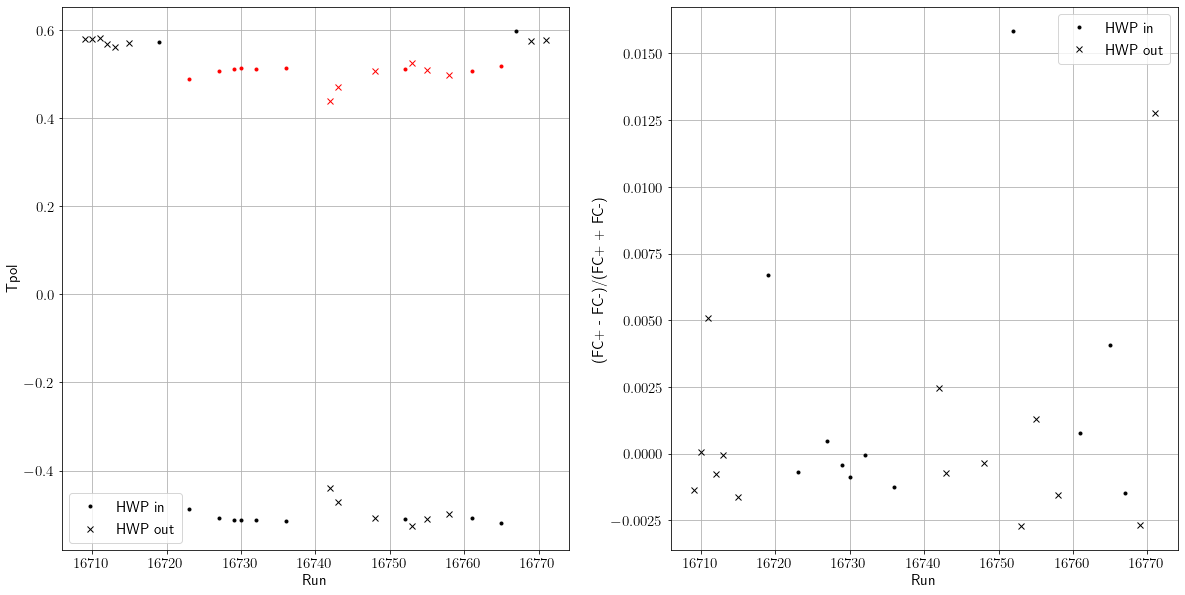

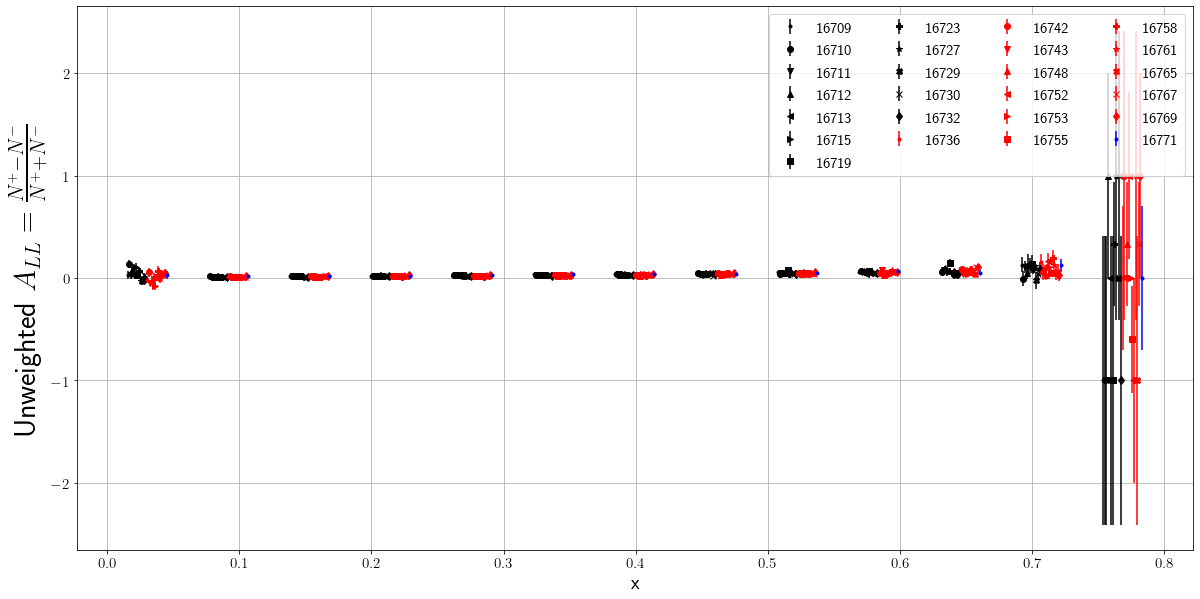

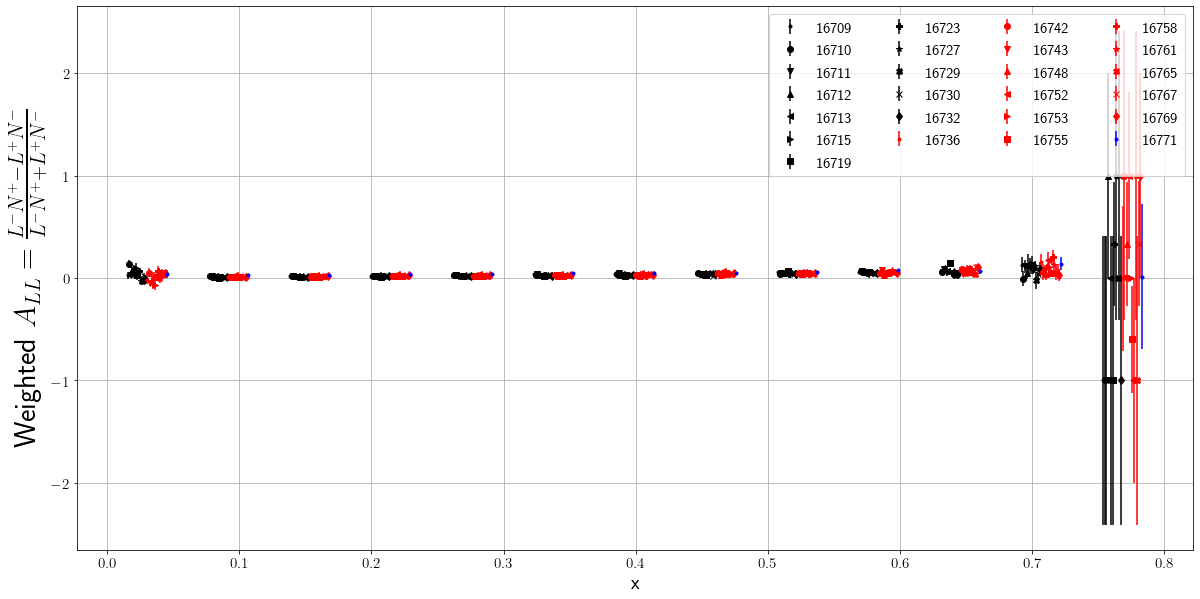

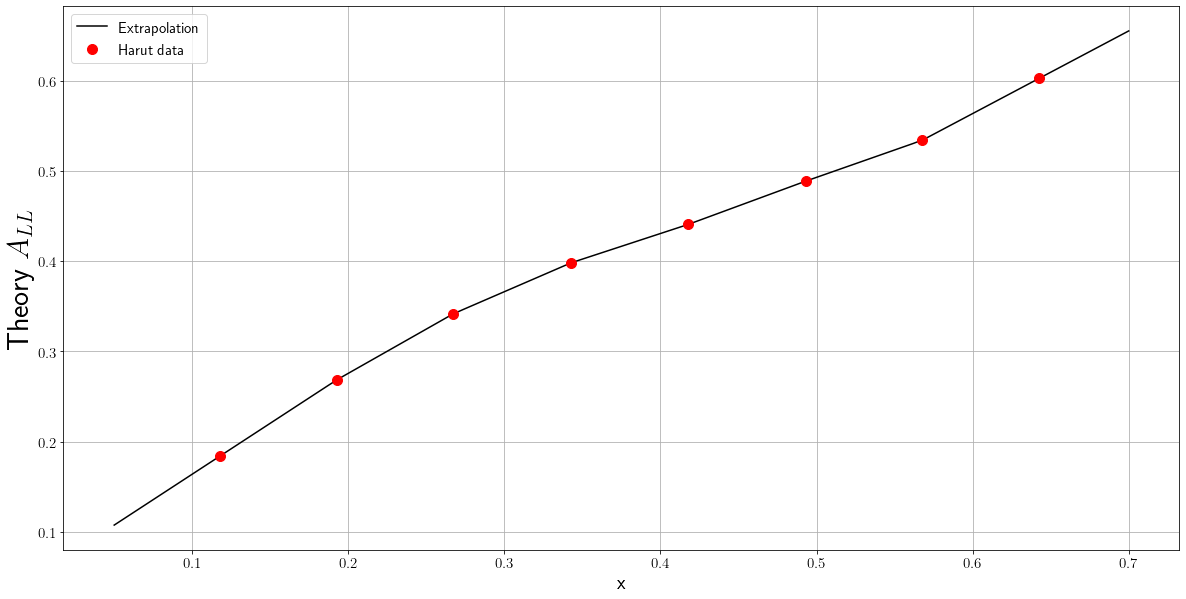

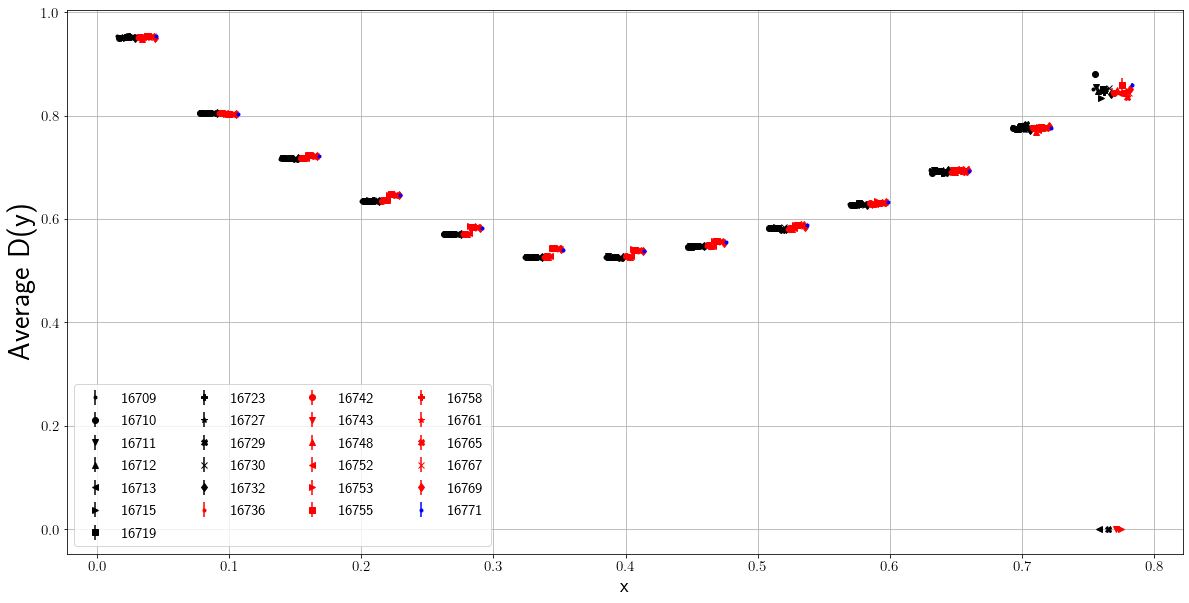

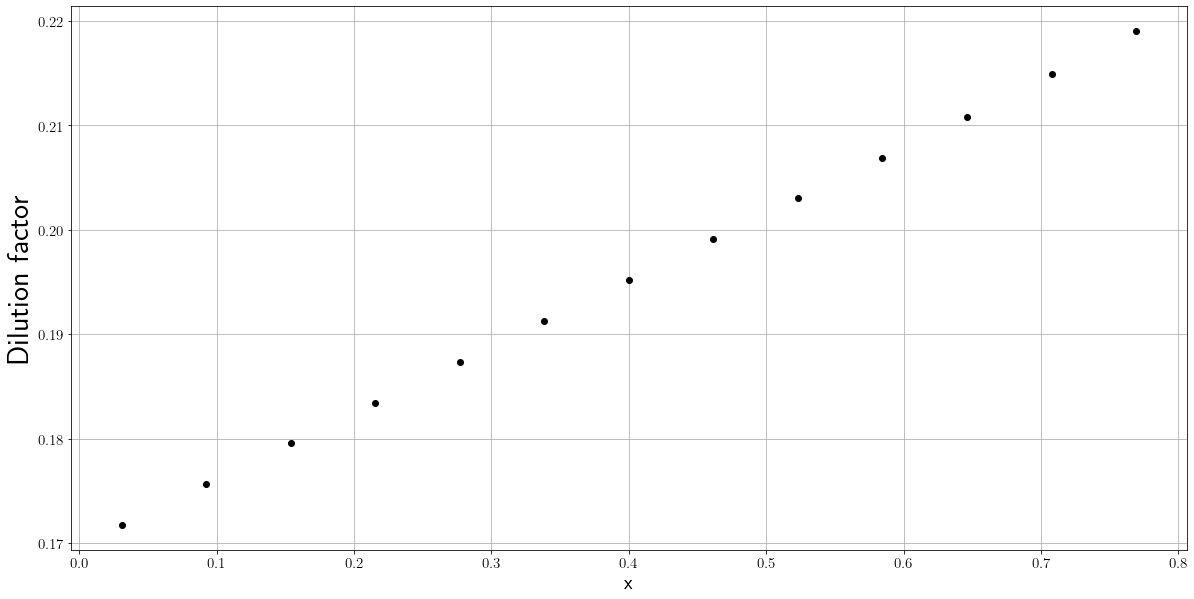

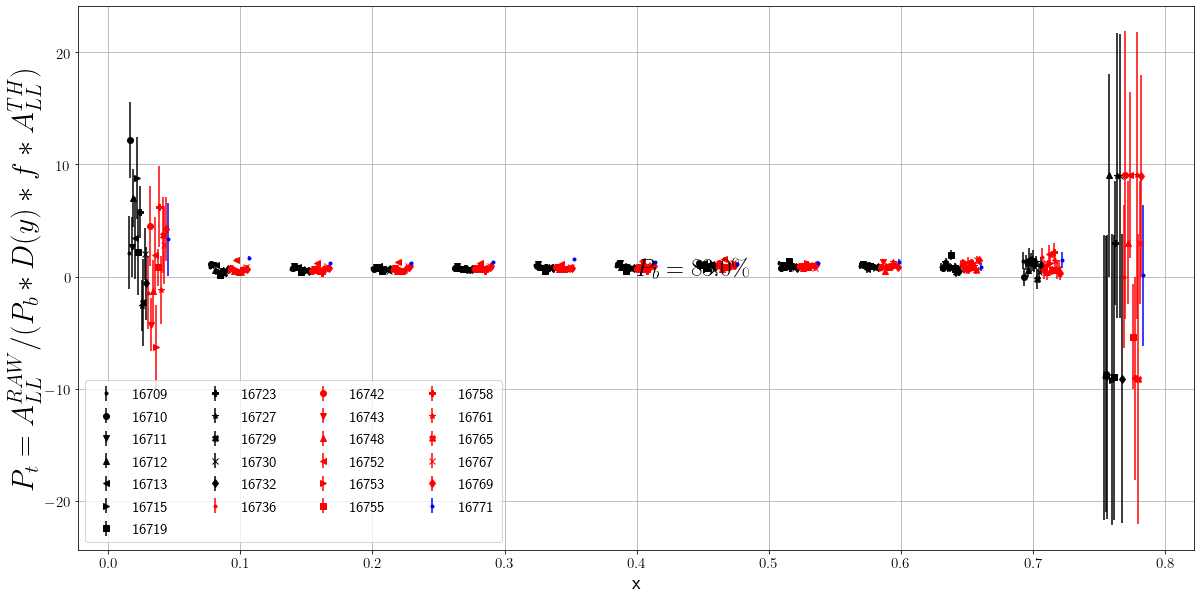

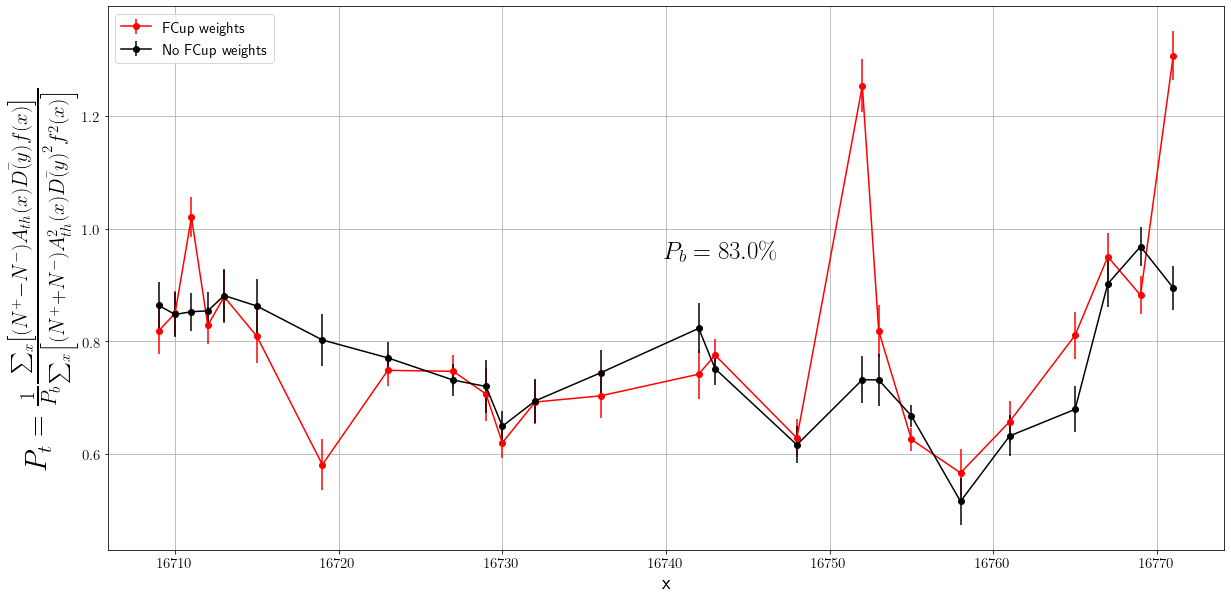

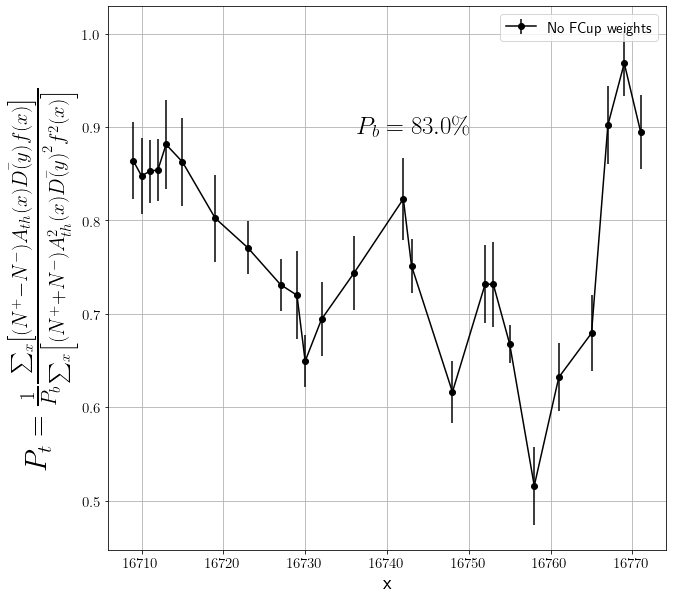

In [132]:
%run ./toolkit/asym_tools.ipynb
beamPol = 0.83   # Polarization of beam
DF = multigraph(df,beamPol,scaleby)

In [127]:
display(DF)

,Run,Target,Tpol RCDB,HWP,binType,min,max,A_LL,A_LL_err,A_LL_wt,A_LL_wt_err,A_LL_theory,D,D_err,f,fcup_pos,fcup_neg,N+,N-,N+err,N-err,n+,n-,n+err,n-err,Pb,Pt,Pt_err
0,16709,NH3,0.580466,out,x,0.000000,0.114286,0.009316,0.004011,0.007950,0.004011,0.11560948990016388,0.817002,0.000243,0.1734,4334.740,4346.600,31364.0,30785.0,177.098842,175.456547,7.215755,7.101925,0.040744,0.040477,0.83,0.861397,0.040894
1,16709,NH3,0.580466,out,x,0.114286,0.228571,0.019833,0.001615,0.018468,0.001615,0.2445504451208619,0.694373,0.000207,0.1807,4334.740,4346.600,195603.0,187995.0,442.270279,433.583902,45.001380,43.369383,0.101751,0.100025,0.83,0.861397,0.040894
2,16709,NH3,0.580466,out,x,0.228571,0.342857,0.026015,0.001980,0.024650,0.001980,0.35544527246710533,0.567578,0.000325,0.1879,4334.740,4346.600,130879.0,124242.0,361.772028,352.479787,30.110661,28.661927,0.083231,0.081315,0.83,0.861397,0.040894
3,16709,NH3,0.580466,out,x,0.342857,0.457143,0.034436,0.003061,0.033071,0.003061,0.430578216244488,0.526243,0.000493,0.1952,4334.740,4346.600,55273.0,51593.0,235.102105,227.140925,12.716376,11.902213,0.054089,0.052400,0.83,0.861397,0.040894
4,16709,NH3,0.580466,out,x,0.457143,0.571429,0.057724,0.006076,0.056362,0.006075,0.5014510716109085,0.570288,0.000835,0.2024,4334.740,4346.600,14375.0,12806.0,119.895788,113.163598,3.307183,2.954272,0.027584,0.026106,0.83,0.861397,0.040894
5,16709,NH3,0.580466,out,x,0.571429,0.685714,0.051618,0.015736,0.050255,0.015735,0.5896023991363004,0.658415,0.001676,0.2097,4334.740,4346.600,2129.0,1920.0,46.141088,43.817805,0.489808,0.442933,0.010615,0.010109,0.83,0.861397,0.040894
6,16709,NH3,0.580466,out,x,0.685714,0.800000,0.133333,0.082372,0.131991,0.082358,0.6942417384555178,0.788469,0.004037,0.2173,4334.740,4346.600,85.0,65.0,9.219544,8.062258,0.019556,0.014995,0.002121,0.001860,0.83,0.861397,0.040894
7,16710,NH3,0.578679,out,x,0.000000,0.114286,0.020866,0.003929,0.020931,0.003929,0.11560948990016388,0.816769,0.000238,0.1734,838.291,838.183,33073.0,31721.0,181.859836,178.103902,39.457970,37.840082,0.216969,0.212461,0.83,0.843686,0.039963
8,16710,NH3,0.578679,out,x,0.114286,0.228571,0.016687,0.001586,0.016752,0.001586,0.2445504451208619,0.694798,0.000203,0.1807,838.291,838.183,202093.0,195459.0,449.547550,442.107453,241.108445,233.163663,0.536336,0.527391,0.83,0.843686,0.039963
9,16710,NH3,0.578679,out,x,0.228571,0.342857,0.027670,0.001941,0.027734,0.001941,0.35544527246710533,0.567677,0.000318,0.1879,838.291,838.183,136435.0,129088.0,369.371087,359.288185,162.774716,153.989486,0.440681,0.428596,0.83,0.843686,0.039963


In [133]:
DF.to_csv("/work/clas12/users/gmat/RGC_16700_16771_14xbins.csv")